## [robocam.py 파일 열기]

- C:\Users\lhacoding\AppData\Roaming\Python\Python311\site-packages\RoboCam

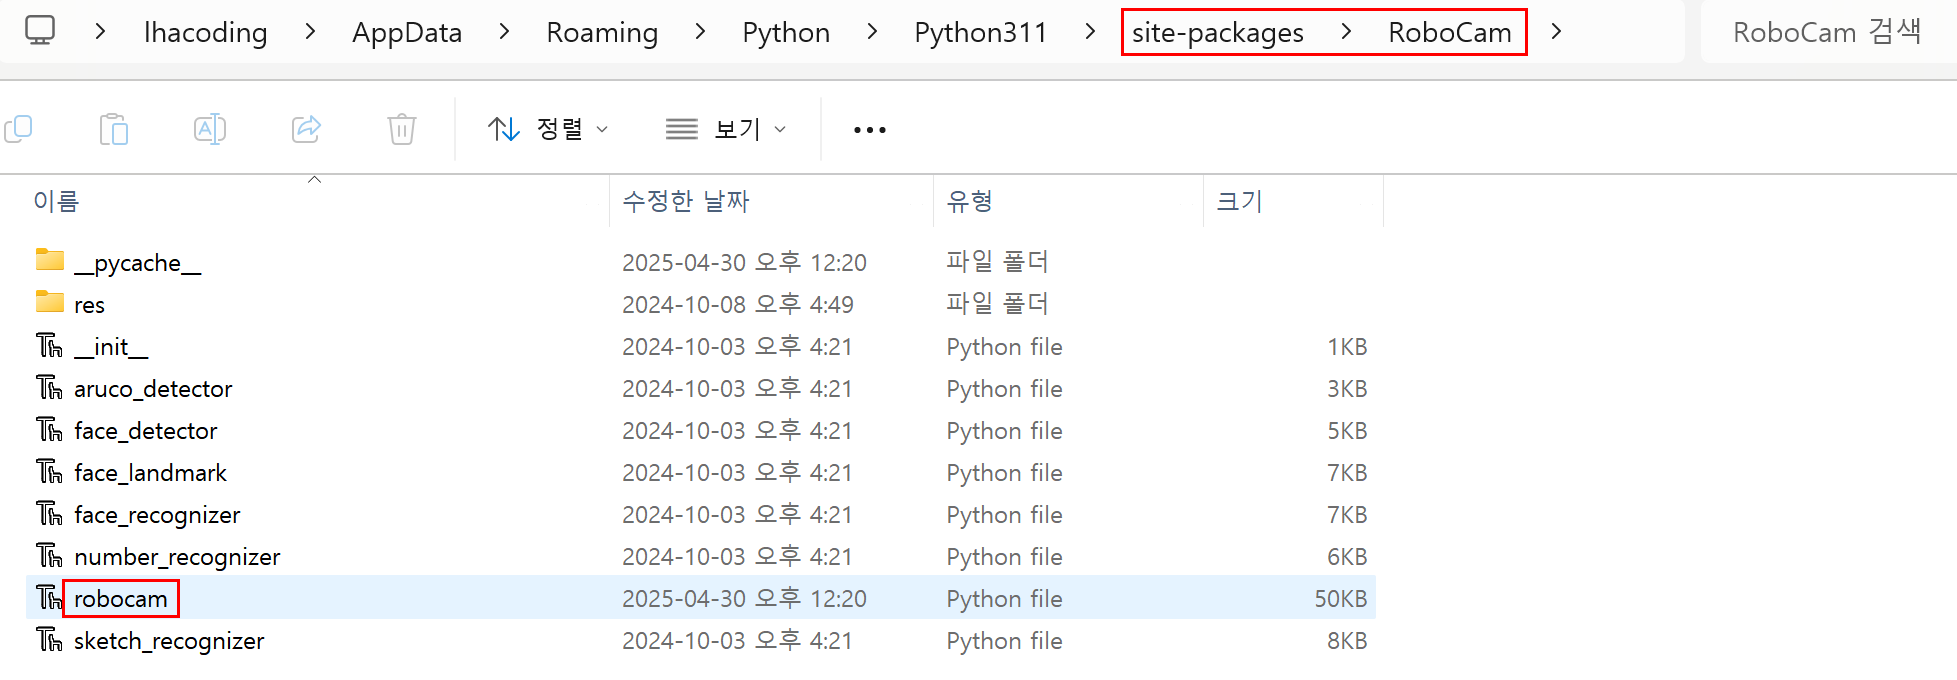

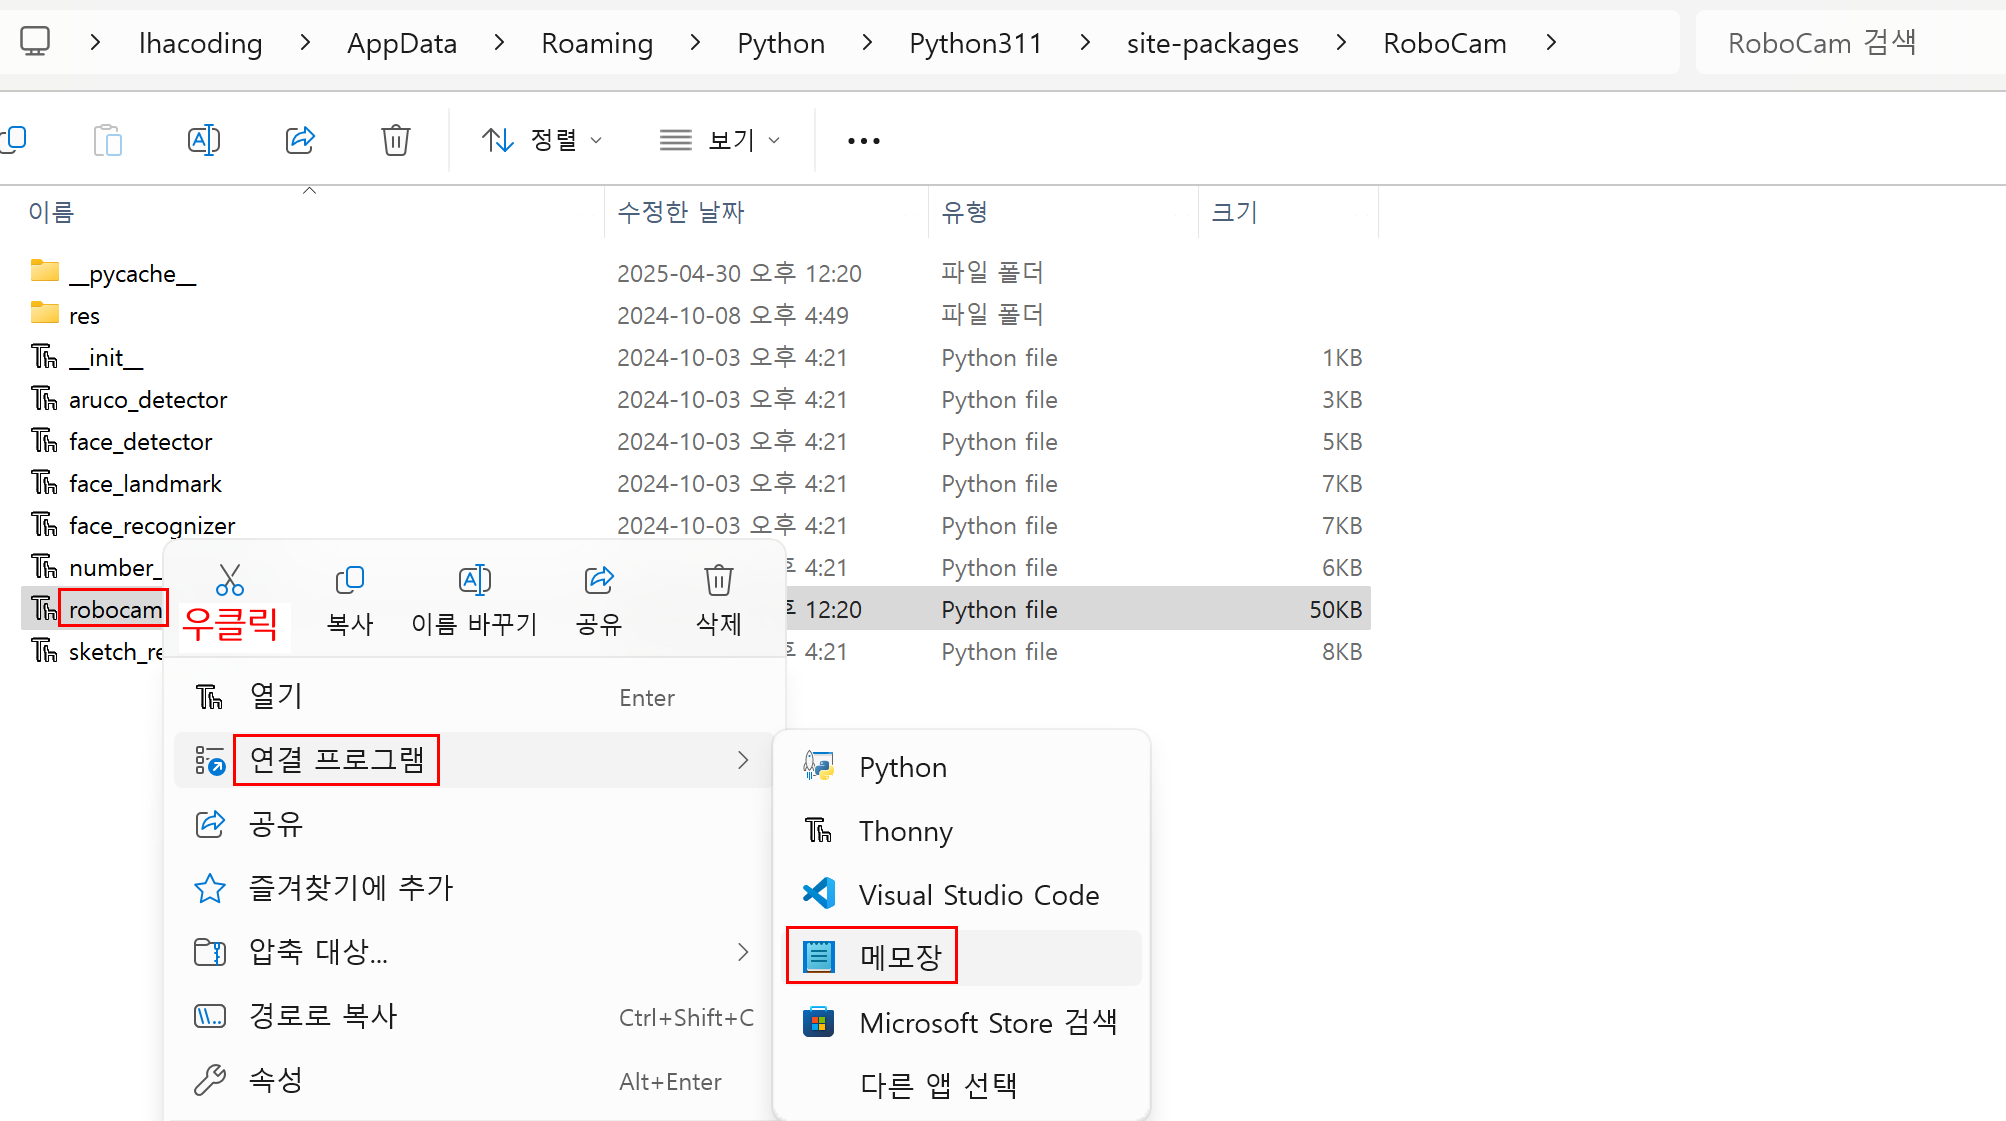

## [코드 수정하기]

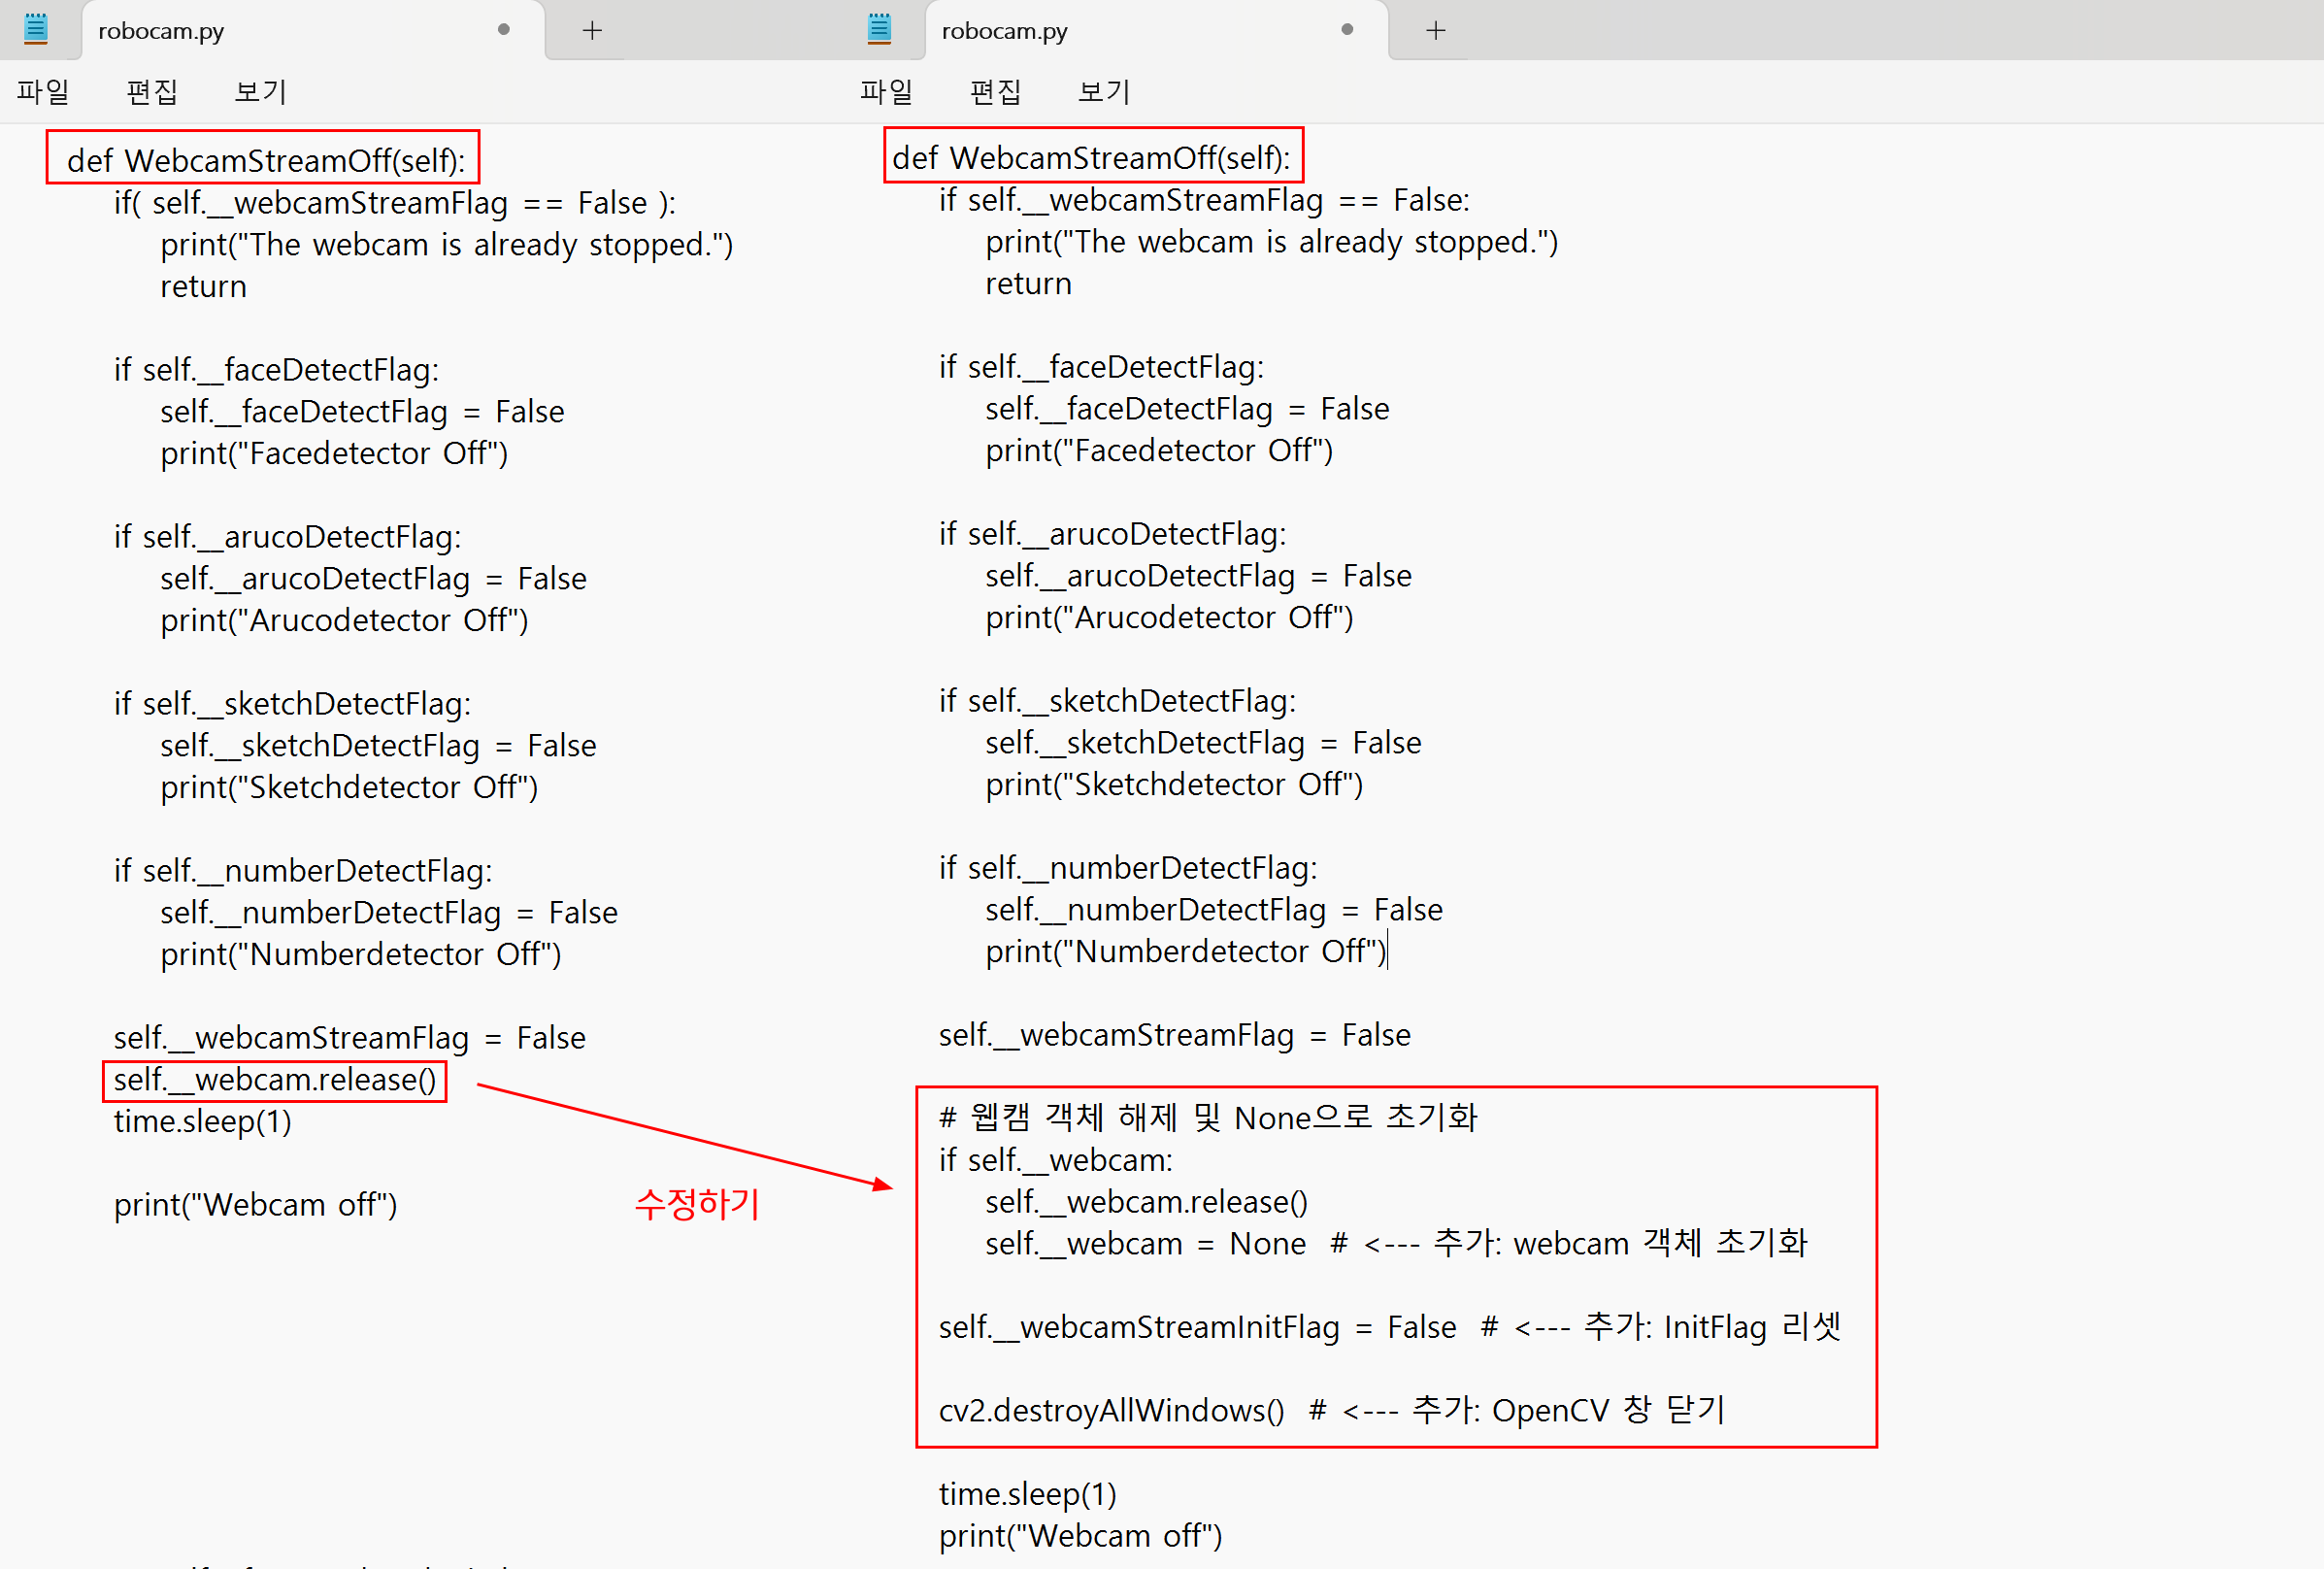

### [RoboCam 라이브러리 가져오기]

In [ ]:
from RoboCam.robocam import *
import time
rCam = RoboCam()

folders already exist
camera module ready


### [ 스트리밍 준비/시작]

In [ ]:
rCam.WebcamStreamInit()
rCam.WebcamStream()

webcam stream ready
camera event module ready


### [얼굴인식 초기화/실행]

In [ ]:
rCam.FacedetectorInit()
rCam.FacedetectorStart()

Facedetector initialized


### [얼굴인식 중지]

In [ ]:
rCam.FacedetectorStop()

Facedetector off


### [영상 스트리밍 종료]

In [ ]:
rCam.WebcamStreamOff()

Stream stopped
Webcam off


## [코드 추가하기]

- WebcamStreamInit(),WebcamStream() -> StartWebcamStream()
- 스트림 시작 메서드를 하나로 합치고 추가하기

```python
def StartWebcamStream(self, width: int = 640, height: int = 480):
    if self.__cameraStreamInitFlag or self.__cameraStreamFlag:
        print("Camera stream is already running.")
        return
    if self.__webcamStreamInitFlag or self.__webcamStreamFlag:
        print("Webcam stream is already running.")
        return

    while True:
        try:
            self.__webcam = cv2.VideoCapture(0)
            if not self.__webcam.isOpened():
                time.sleep(0.5)
                continue
            else:
                break
        except:
            time.sleep(0.5)
            continue

    self.__camWidth = width
    self.__camHeight = height
    self.__webcamStreamInitFlag = True
    print("Webcam stream ready")

    dataSenderTH = threading.Thread(target=self.__dataSender)
    dataSenderTH.daemon = True
    dataSenderTH.start()
    time.sleep(0.1)

    self.__webcamStreamFlag = True
    th = threading.Thread(target=self.__webcamStreamTh)
    th.daemon = True
    th.start()

    print("Camera event module ready")
```      

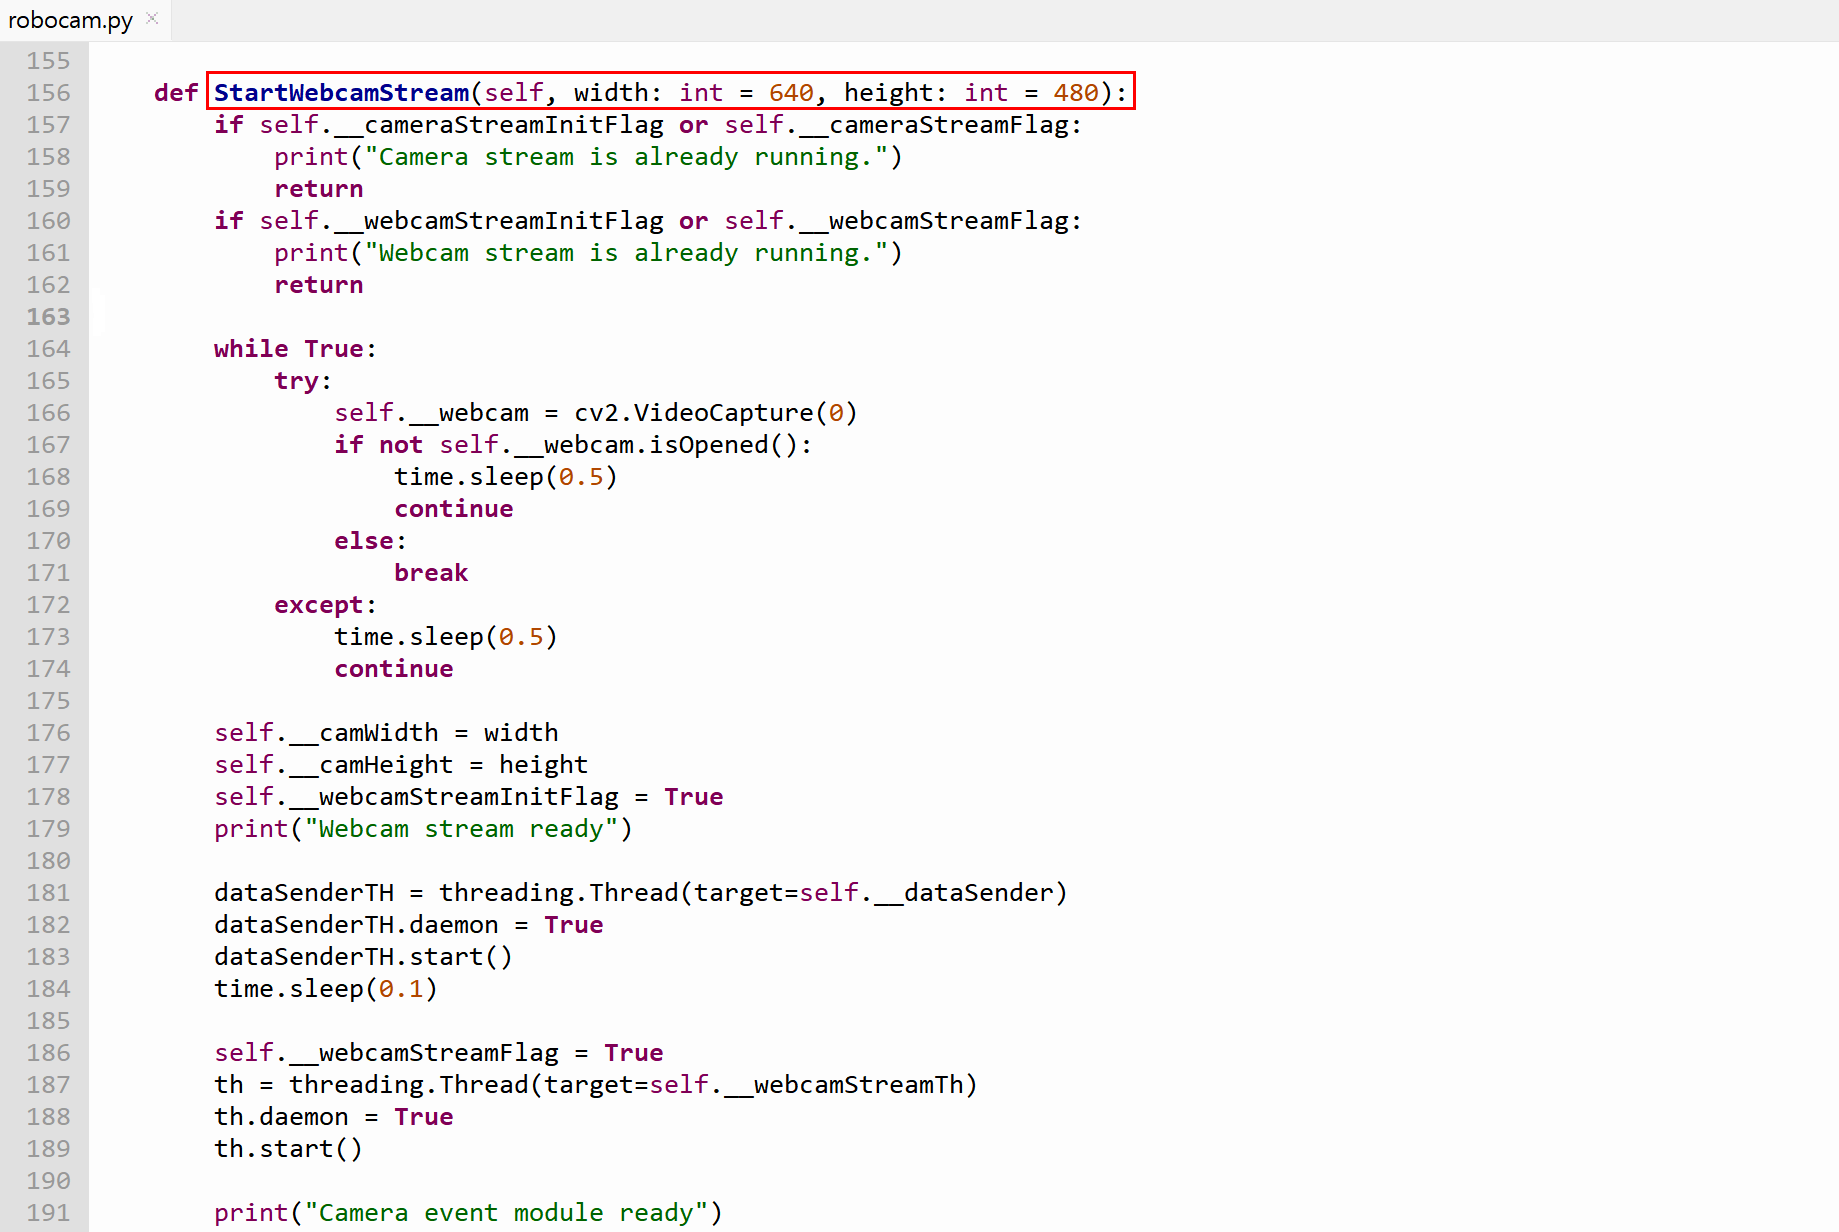

- 커널 재시작하기

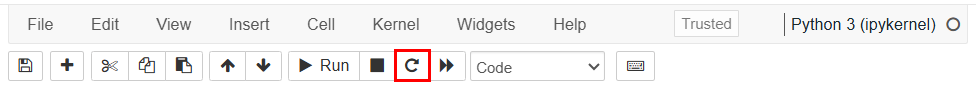

In [ ]:
from RoboCam.robocam import *
import time
rCam = RoboCam()

folders already exist
camera module ready


In [ ]:
rCam.StartWebcamStream()

webcam stream ready
camera event module ready


In [ ]:
rCam.WebcamStreamOff()

Stream stopped
Webcam off
